# Mall Customer Segmentation Data Analysis and Using K-Means Clustering

In [1]:
import pandas as pd # It is used for linear algebra (if requied)
import numpy as np # It is used for data processing 
import seaborn as sns # It is used for data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

#### Using Pandas we will easily read the CSV file and store in Customer DataFrame 

In [2]:
Customer = pd.read_csv('Mall_Customers.csv')

#### Showing the first 10 records  

In [3]:
Customer.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### Showing the last 10 records  

In [4]:
Customer.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
Customer.shape

(200, 5)

In [6]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
Customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Checking the Null values 

In [8]:
Customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Set Customer ID as a Index of the Customer DataFrame 

In [9]:
Customer.set_index('CustomerID',inplace=True)

In [10]:
Customer.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Exploratory Data Analysis  

#### Here We are creating the Distribution Plots for Age, Annual Income, Spending Score

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

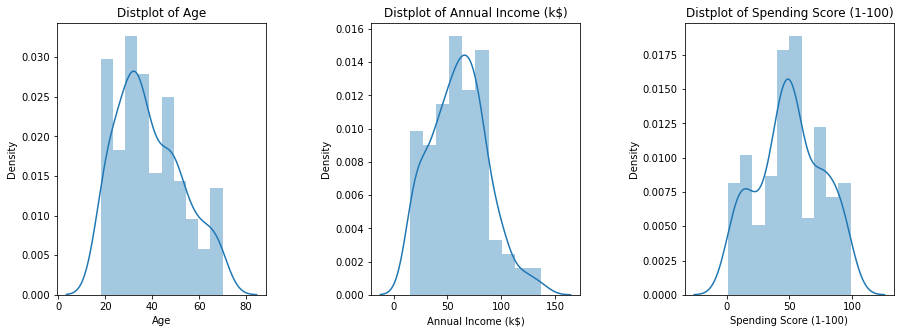

In [11]:
def distplot(cols):
    plt.figure(1 , figsize = (15,5))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Distplot of {0}'.format(i))
        sns.distplot(Customer[i],bins=10)
    plt.show()
distplot(['Age','Annual Income (k$)', 'Spending Score (1-100)'])

#### Use a cataplot to compare males and females for age  

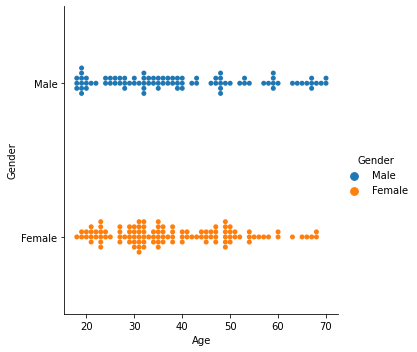

In [12]:
sns.catplot(data=Customer,x='Age',y='Gender',hue="Gender", kind="swarm")

#### Use a cataplot to compare males and females for Annual Income

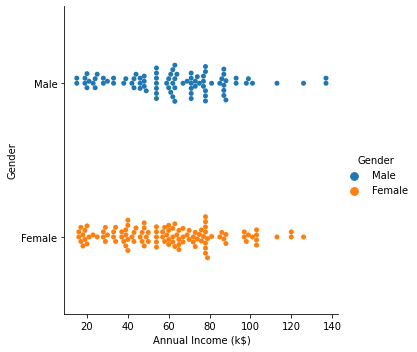

In [13]:
sns.catplot(data=Customer,x='Annual Income (k$)',y='Gender',hue="Gender", kind="swarm")

####  Use a cataplot to compare males and females for Spending Score

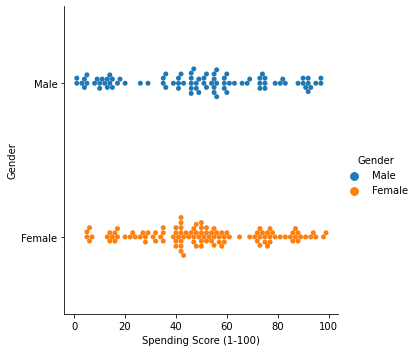

In [14]:
sns.catplot(data=Customer,x='Spending Score (1-100)',y='Gender',hue="Gender", kind="swarm")

#### We are counting males and females using counterplot

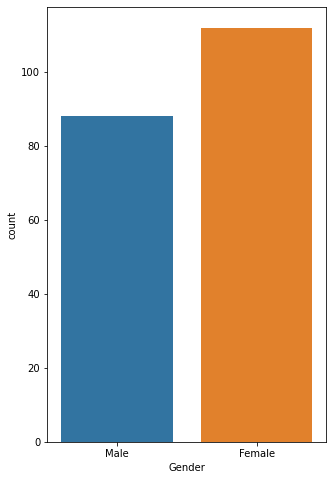

In [15]:
plt.figure(1,figsize=(5,8))
sns.countplot(x='Gender',data=Customer)
plt.show()

#### Here We are creating the violinplot Plots to compare males and females for Age, Annual Income, Spending Score 

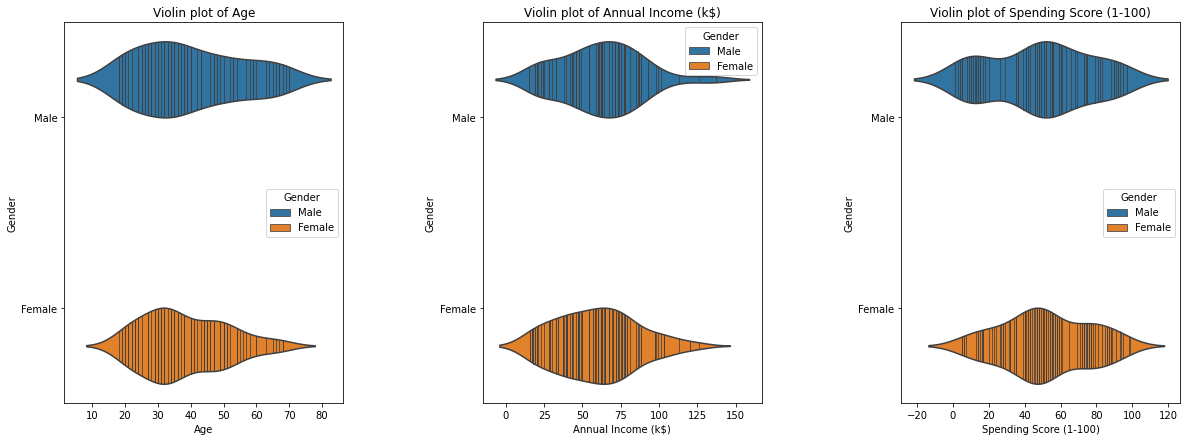

In [16]:
def violinplot(cols):
    plt.figure(1 , figsize = (20,7))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Violin plot of {0}'.format(i))
        sns.violinplot(x=i,y='Gender',data=Customer, hue='Gender', inner="stick")
    plt.show()
violinplot(['Age','Annual Income (k$)', 'Spending Score (1-100)'])

#### Here we are distributing the customers by the age groups  

In [18]:
def age_distribution():
    min_age = Customer['Age'].min()
    age_18_25 = Customer.Age[(Customer.Age >=min_age) & (Customer.Age<=25)]
    age_26_40 = Customer.Age[(Customer.Age >=26) & (Customer.Age<=40)]
    age_41_55 = Customer.Age[(Customer.Age >=41) & (Customer.Age<=55)]
    age_56_65 = Customer.Age[(Customer.Age >=56) & (Customer.Age<=65)]
    age_66_above = Customer.Age[(Customer.Age >=66)]
    
    age_diff = ["18-25","26-40","41-55","56-65","65+"]
    total_Cust = [len(age_18_25),len(age_26_40),len(age_41_55),len(age_56_65),len(age_66_above)]

    return age_diff,total_Cust
    

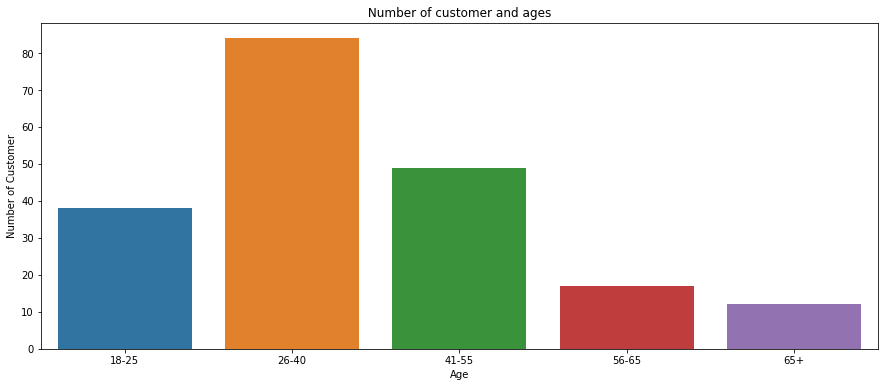

In [19]:
agex,agey = age_distribution()
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey)
plt.title(' Number of customer and ages ')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

#### Using a relplot to compare the Annual Income and Spending Score columns. 

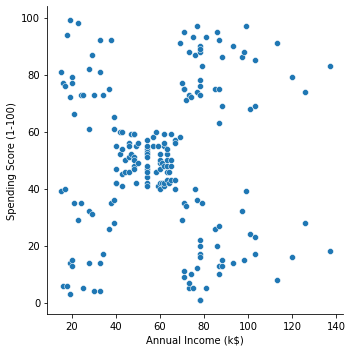

In [20]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Customer)

#### Using a jointplot to create a 2D hex bin plot comparing Annual Income and Spending Score 

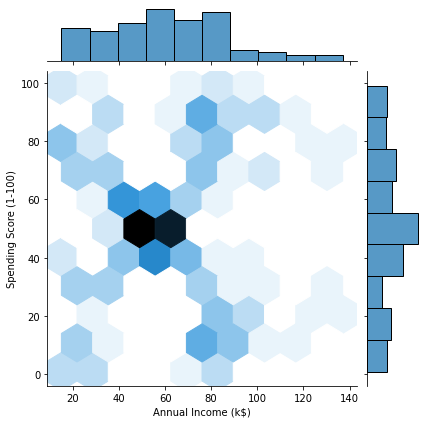

In [21]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Customer,kind='hex')

#### Here we are distributing the customer by spending score

In [22]:
def Spending_Score_distribution():
    min_spend = Customer['Spending Score (1-100)'].min()
    spend_1_20 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=min_spend) & (Customer['Spending Score (1-100)']<=20)]
    spend_21_40 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=21) & (Customer['Spending Score (1-100)']<=40)]
    spend_41_60 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=41) & (Customer['Spending Score (1-100)']<=60)]
    spend_61_80 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=61) & (Customer['Spending Score (1-100)']<=80)]
    spend_81_100 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=81) & (Customer['Spending Score (1-100)']<=100)]
    
    spend_x = ['1-20','21-40','41-60','61-80','81-100']
    spend_y = [len(spend_1_20),len(spend_21_40),len(spend_41_60),len(spend_61_80),len(spend_81_100)]
    
    return spend_x,spend_y

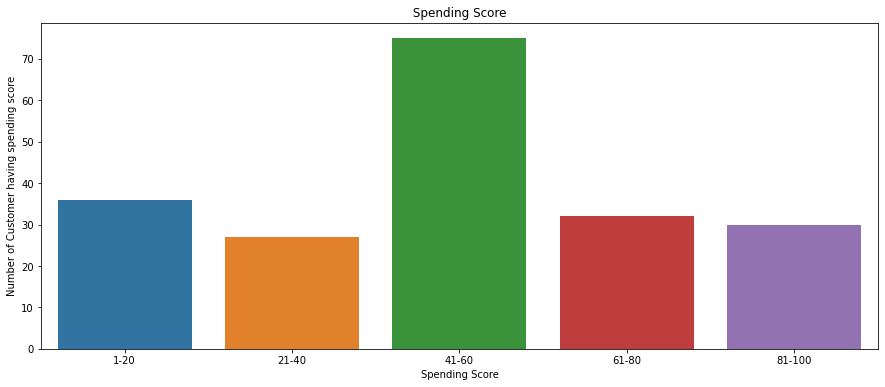

In [23]:
spend_x,spend_y = Spending_Score_distribution()
plt.figure(figsize=(15,6))
sns.barplot(x=spend_x,y=spend_y)
plt.title(' Spending Score ')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customer having spending score')
plt.show()

#### Here we are distributing the customer by annual score

In [24]:
def Annual_score_distribution():
    min_Annual = Customer['Annual Income (k$)'].min()
    Annual_min_30 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=min_Annual) & (Customer['Annual Income (k$)']<=30)]
    Annual_31_60 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=31) & (Customer['Annual Income (k$)']<=60)]
    Annual_61_90 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=61) & (Customer['Annual Income (k$)']<=90)]
    Annual_91_120 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=91) & (Customer['Annual Income (k$)']<=120)]
    Annual_121_150 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=121) & (Customer['Annual Income (k$)']<=150)]
    
    Annual_x = ['(1-30,000)$','(31,000-60,000)$','(61,000-90,000)$','(91,000-120,000)$','(121,000-150,000)$']
    Annual_y = [len(Annual_min_30),len(Annual_31_60),len(Annual_61_90),len(Annual_91_120),len(Annual_121_150)]

    return Annual_x,Annual_y

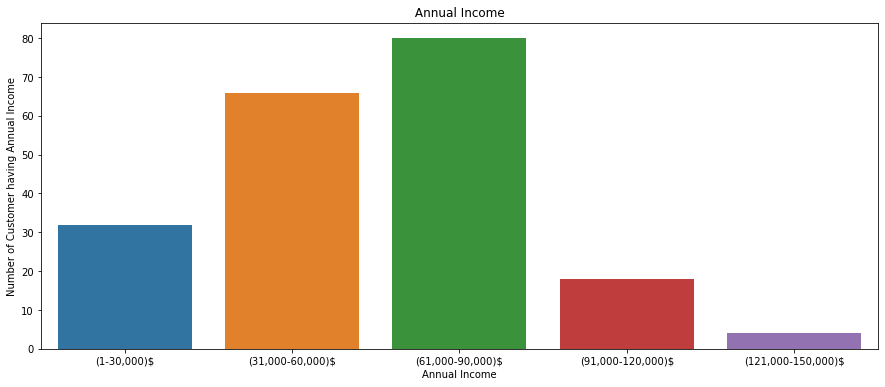

In [25]:
Annual_x,Annual_y = Annual_score_distribution()
plt.figure(figsize=(15,6))
sns.barplot(x=Annual_x,y=Annual_y)
plt.title(' Annual Income ')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customer having Annual Income')
plt.show()

### Clustering using K- means   

#### 1: Segmentation using Age and Spending Score 

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


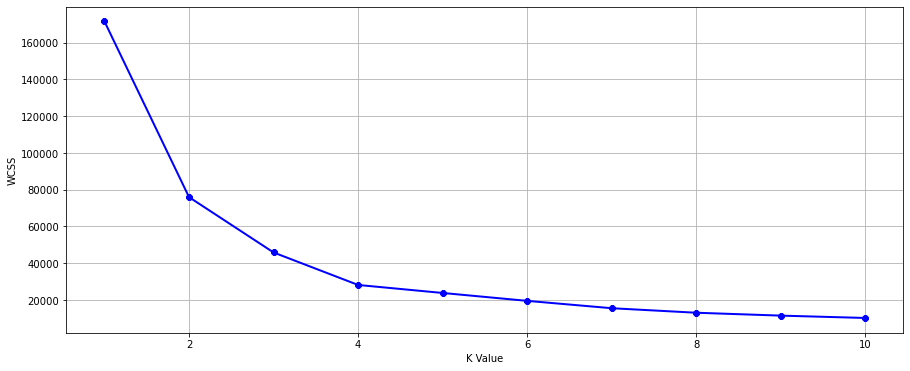

In [28]:

from sklearn.cluster import KMeans

X_data1 = Customer.loc[:,['Age','Spending Score (1-100)']].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_data1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Looking at the above graph, we are selecting 4 clusters

In [29]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X_data1)
label

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [30]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


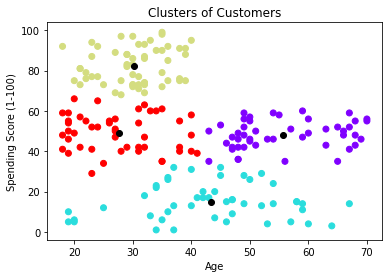

In [31]:
plt.scatter(X_data1[:,0],X_data1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### 2: Segmentation using Annual Income and Spending Score 

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


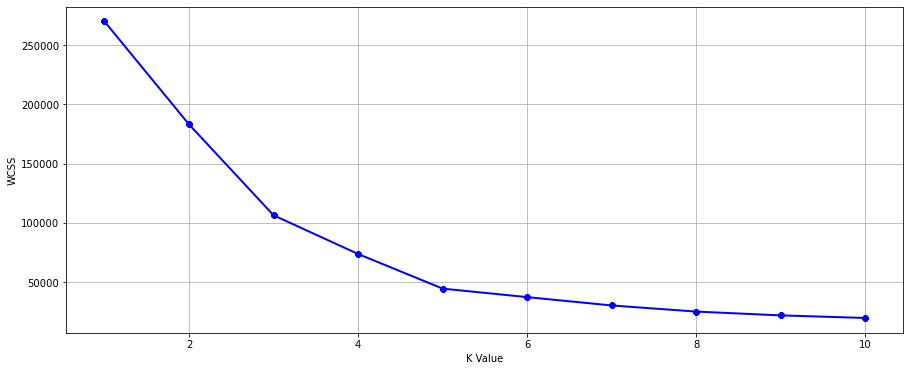

In [32]:
X_data2 = Customer.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_data2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Looking at the above graph, we are selecting 5 clusters 

In [33]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X_data2)
label

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [34]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


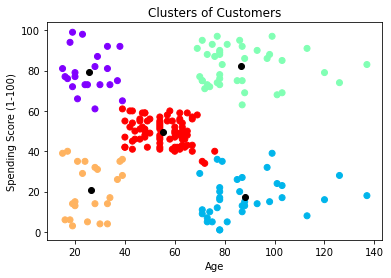

In [35]:
plt.scatter(X_data2[:,0],X_data2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### 3: Segmentation using Age , Annual Income and Spending Score 

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


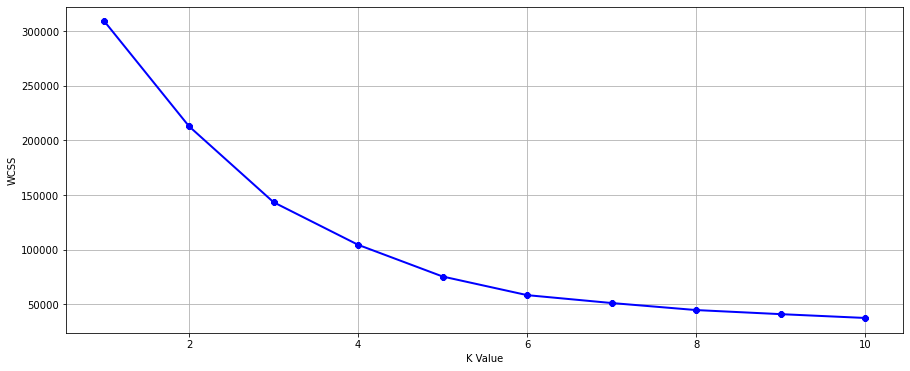

In [36]:
X_data3 = Customer.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_data3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

####  Looking at the above graph, we are selecting 6 clusters

In [37]:
kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(X_data3)
label

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 4, 5, 2, 3,
       2, 5, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [38]:
print(kmeans.cluster_centers_)

[[41.68571429 88.22857143 17.28571429]
 [32.69230769 86.53846154 82.12820513]
 [44.31818182 25.77272727 20.27272727]
 [27.         56.65789474 49.13157895]
 [56.34090909 53.70454545 49.38636364]
 [25.27272727 25.72727273 79.36363636]]


In [39]:
cluster = kmeans.fit_predict(X_data3)
Customer['label'] = cluster

#### 3D Plot 

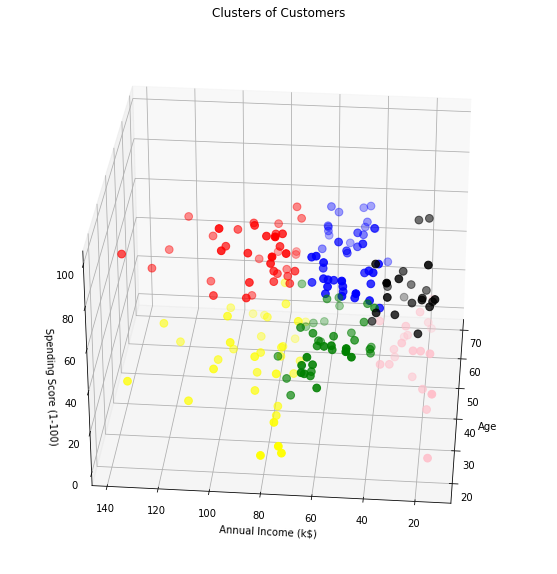

In [40]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter(Customer.Age[Customer.label==0],Customer['Annual Income (k$)'][Customer.label==0],Customer['Spending Score (1-100)'][Customer.label==0], c='blue',s=60)
ax.scatter(Customer.Age[Customer.label==1],Customer['Annual Income (k$)'][Customer.label==1],Customer['Spending Score (1-100)'][Customer.label==1], c='red',s=60)
ax.scatter(Customer.Age[Customer.label==2],Customer['Annual Income (k$)'][Customer.label==2],Customer['Spending Score (1-100)'][Customer.label==2], c='yellow',s=60)
ax.scatter(Customer.Age[Customer.label==3],Customer['Annual Income (k$)'][Customer.label==3],Customer['Spending Score (1-100)'][Customer.label==3], c='green',s=60)
ax.scatter(Customer.Age[Customer.label==4],Customer['Annual Income (k$)'][Customer.label==4],Customer['Spending Score (1-100)'][Customer.label==4], c='black',s=60)
ax.scatter(Customer.Age[Customer.label==5],Customer['Annual Income (k$)'][Customer.label==5],Customer['Spending Score (1-100)'][Customer.label==5], c='pink',s=60)
ax.view_init(30,185)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Clusters of Customers')

plt.show()